# <center><b><i>RADIAL BASIS FUNCTION</i></b></center>
<br/>
<br/>

# School of AI - São Paulo
## Professor:   Victor Venites
## Data: 02/07/2019

In [1]:
%%html
<marquee style='width: 100%; color: blue;'><h1><b>Radial <i>"Base"</i> Function</b></h1></marquee>

## Dependencias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

np.random.seed(1)

## <center>Interpolação</center>
### Exemplo - Ondas Senoidais

In [3]:
from ipywidgets import *
# Biblioteca para interação com Jupyter... Neste caso o gráfico
t = np.arange(0.0, 1.0, 0.01)
def plotSeno(f):
    plt.plot(t, f * np.sin(2 * np.pi * t * f))
    plt.show()
interact(plotSeno, f=(1, 100, 1))

interactive(children=(IntSlider(value=50, description='f', min=1), Output()), _dom_classes=('widget-interact',…

<function __main__.plotSeno(f)>

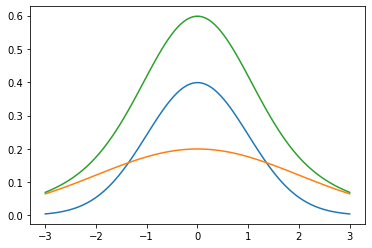

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(x, stats.norm.pdf(x, mu, sigma*2))
plt.plot(x, stats.norm.pdf(x, mu, sigma) + stats.norm.pdf(x, mu, sigma*2))
plt.show()

## <center>Matriz Pseudo-Inversa</center>
### Exemplo - X.W = Y

In [5]:
Base_Original = "breastCancer.xlsx"
endereco = "Bases_de_Dados\\" + Base_Original
banco_de_dados = pd.read_excel(endereco, index_col=0)
df = banco_de_dados.copy()
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4
1018099,1,1,1,1,2,10,3,1,1,2
1018561,2,1,2,1,2,1,3,1,1,2
1033078,2,1,1,1,2,1,1,1,5,2


In [6]:
Matriz_X = pd.DataFrame(df.iloc[:, 0: -1])
Matriz_X[Matriz_X.shape[1]] = 1 # Bias/Vies/Coeficiente Linear
Matriz_X

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,9
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,1
1002945,5,4,4,5,7,10,3,2,1,1
1015425,3,1,1,1,2,2,3,1,1,1
1016277,6,8,8,1,3,4,3,7,1,1
1017023,4,1,1,3,2,1,3,1,1,1
1017122,8,10,10,8,7,10,9,7,1,1
1018099,1,1,1,1,2,10,3,1,1,1
1018561,2,1,2,1,2,1,3,1,1,1
1033078,2,1,1,1,2,1,1,1,5,1


In [7]:
Matriz_Y = pd.DataFrame(df.iloc[:, -1:])
Matriz_Y

,class
id,
1000025,2
1002945,2
1015425,2
1016277,2
1017023,2
1017122,4
1018099,2
1018561,2
1033078,2


In [8]:
Matriz_X.T

id,1000025,1002945,1015425,1016277,1017023,1017122,1018099,1018561,1033078,1033078,...,654546,654546,695091,714039,763235,776715,841769,888820,897471,897471
clump_thickness,5,5,3,6,4,8,1,2,2,4,...,1,1,5,3,3,3,2,5,4,4
size_uniformity,1,4,1,8,1,10,1,1,1,2,...,1,1,10,1,1,1,1,10,8,8
shape_uniformity,1,4,1,8,1,10,1,2,1,1,...,1,1,10,1,1,1,1,10,6,8
marginal_adhesion,1,5,1,1,3,8,1,1,1,1,...,1,3,5,1,1,1,1,3,4,5
epithelial_size,2,7,2,3,2,7,2,2,2,2,...,2,2,4,2,2,3,2,7,3,4
bare_nucleoli,1,10,2,4,1,10,10,1,1,1,...,1,1,5,1,1,2,1,3,4,5
bland_chromatin,3,3,3,3,3,9,3,3,1,2,...,1,1,4,1,2,1,1,8,10,10
normal_nucleoli,1,2,1,7,1,7,1,1,1,1,...,1,1,4,1,1,1,1,10,6,4
mitoses,1,1,1,1,1,1,1,1,5,1,...,8,1,1,1,2,1,1,2,1,1
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [9]:
Matriz_Quadrada = pd.DataFrame(np.dot(Matriz_X.T, Matriz_X))
Matriz_Quadrada

,0,1,2,3,4,5,6,7,8,9
0,18904,13348,13512,11275,12052,14912,13062,11843,6034,3034
1,13348,13188,12587,10324,10462,12897,11283,10766,5119,2152
2,13512,12587,13152,10220,10376,13086,11237,10769,5079,2196
3,11275,10324,10220,11067,8834,11626,9859,9144,4517,1933
4,12052,10462,10376,8834,10515,11066,9906,9250,4804,2209
5,14912,12897,13086,11626,11066,17637,12484,11380,5342,2421
6,13062,11283,11237,9859,9906,12484,12199,10147,4774,2353
7,11843,10766,10769,9144,9250,11380,10147,11980,4707,1960
8,6034,5119,5079,4517,4804,5342,4774,4707,3803,1095
9,3034,2152,2196,1933,2209,2421,2353,1960,1095,683


In [10]:
Matriz_Inversa = np.linalg.inv(Matriz_Quadrada)
Matriz_Inversa

array([[ 3.51185997e-04, -6.05137805e-05, -8.46762291e-05,
         2.74462794e-05, -3.84506710e-06, -6.60107134e-05,
        -1.89581116e-05, -1.98076669e-05, -3.20155511e-05,
        -7.54880142e-04],
       [-6.05137805e-05,  1.12286531e-03, -6.86900174e-04,
        -1.02195762e-04, -2.26530751e-04,  1.94971110e-05,
        -1.67242604e-04, -5.10627659e-05, -4.04757298e-05,
         6.79794381e-04],
       [-8.46762291e-05, -6.86900174e-04,  1.07526131e-03,
        -1.56802489e-05, -6.28115887e-05, -9.76418171e-05,
        -3.91448490e-05, -9.06045879e-05, -2.48160148e-06,
         7.57024334e-05],
       [ 2.74462794e-05, -1.02195762e-04, -1.56802489e-05,
         4.40697572e-04, -2.07118665e-05, -9.74303225e-05,
        -9.81449258e-05, -3.05297147e-05, -7.20351363e-05,
        -4.31892562e-05],
       [-3.84506710e-06, -2.26530751e-04, -6.28115887e-05,
        -2.07118665e-05,  7.58439567e-04, -2.59252420e-05,
        -2.65350341e-05, -5.86849678e-05, -1.42347343e-04,
        -8.

In [11]:
Matriz_Pseudo_Inversa = pd.DataFrame(np.dot(Matriz_Inversa, Matriz_X.T))
Matriz_Pseudo_Inversa

,0,1,2,3,4,5,6,7,8,9,...,673,674,675,676,677,678,679,680,681,682
0,7.009077e-04,-0.000258,-0.000067,-0.000285,0.000405,-0.000206,-0.001298,-0.000437,-0.000443,0.000308,...,-0.000890,-0.000611,-0.000846,0.000036,-0.000015,-0.000033,-0.000315,-0.001007,-0.000849,-0.001021
1,-3.158358e-04,-0.000425,-0.000175,0.002201,-0.000460,0.000444,0.000102,-0.000821,0.000038,0.001035,...,-0.000023,0.000056,0.002504,0.000140,-0.000068,-0.000067,0.000200,0.000974,0.002270,0.000689
2,-4.087836e-04,-0.000590,-0.000337,0.001326,-0.000355,0.000751,-0.000949,0.000921,-0.000086,-0.000972,...,-0.000009,-0.000023,0.002197,-0.000161,-0.000203,-0.000322,-0.000076,0.001532,-0.000886,0.001270
3,-1.189900e-04,0.000279,-0.000271,-0.001413,0.000735,0.000235,-0.001106,-0.000217,-0.000293,-0.000150,...,-0.000537,0.000849,-0.000038,0.000022,-0.000148,-0.000096,-0.000005,-0.001434,-0.000771,-0.000419
4,-6.142832e-07,0.002549,-0.000019,-0.001701,-0.000038,0.000286,-0.000219,-0.000052,-0.000505,-0.000197,...,-0.000929,0.000026,-0.001477,0.000060,-0.000109,0.000793,0.000064,0.000291,-0.001757,-0.001054
5,-3.501571e-04,0.001475,0.000069,-0.000141,-0.000479,-0.000046,0.002495,-0.000250,0.000118,-0.000173,...,0.000249,-0.000097,-0.000446,-0.000034,-0.000105,0.000227,0.000032,-0.001261,-0.000748,-0.000775
6,7.217692e-04,-0.001351,0.000668,-0.001650,0.000544,0.000775,-0.000030,0.000739,-0.000389,-0.000130,...,-0.000190,-0.000806,-0.001549,-0.000647,0.000116,-0.000766,-0.000628,0.001020,0.003197,0.003104
7,-1.996805e-04,-0.000676,-0.000162,0.001019,-0.000241,-0.000371,-0.000139,-0.000231,-0.000187,-0.000130,...,-0.000354,0.000020,-0.000676,0.000042,-0.000121,-0.000019,0.000062,0.001043,0.000059,-0.000979
8,5.559690e-06,-0.000991,0.000091,-0.000778,-0.000106,-0.001513,0.000328,0.000099,0.002710,-0.000063,...,0.004788,-0.000130,-0.000994,-0.000050,0.000692,-0.000171,-0.000018,-0.000772,-0.000444,-0.000517
9,3.175277e-04,-0.000232,0.002004,0.005542,0.000986,-0.002044,0.004929,0.002658,0.003165,0.002555,...,0.003152,0.004857,0.005606,0.003434,0.002375,0.002729,0.004189,0.000267,0.000975,0.000031


In [12]:
# Entrada de Dados, Transpose, Camada 1, Biases
def PseudoInversa(R): #R = input
    Matriz_X = pd.DataFrame(R) # Matriz de Radiais(Funções) ou Base de Dados
    Matriz_Quadrada = np.dot(Matriz_X.T, Matriz_X)   # Base * Base_T
    Matriz_Inversa = np.linalg.inv(Matriz_Quadrada)   # MAtriz Inversa
    Matriz_Pseudo_Inversa = pd.DataFrame(np.dot(Matriz_Inversa, Matriz_X.T)) # Inversa * Base_Dados_T

    return (Matriz_Pseudo_Inversa)

In [13]:
W_pesos = pd.DataFrame(np.dot(Matriz_Pseudo_Inversa, Matriz_Y))
W_pesos

,0
0,0.063426
1,0.043690
2,0.031279
3,0.016487
4,0.020150
5,0.090773
6,0.038351
7,0.037059
8,0.001958
9,1.504678


In [14]:
# Teste da Função para automatizar
Pseudo_Inversa = PseudoInversa(np.array(Matriz_X))
W_Pesos = np.dot(Pseudo_Inversa, Matriz_Y)
# W = Pseduo_Inversa * Y
W_pesos

,0
0,0.063426
1,0.043690
2,0.031279
3,0.016487
4,0.020150
5,0.090773
6,0.038351
7,0.037059
8,0.001958
9,1.504678


In [15]:
# PRevisao da Matriz Pseudo-Inversa
P_MPI = pd.DataFrame(np.dot(Matriz_X, W_pesos), columns=["Predicao"])
P_MPI.index = df.index
P_MPI

,Predicao
id,
1000025,2.198408
1002945,3.444024
1015425,2.162328
1016277,3.301439
1017023,2.167955
1017122,4.548979
1018099,2.761656
1018561,2.039408
1033078,1.939258


In [16]:
df["Predicao"] = P_MPI
df

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,Predicao
id,,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2,2.198408
1002945,5,4,4,5,7,10,3,2,1,2,3.444024
1015425,3,1,1,1,2,2,3,1,1,2,2.162328
1016277,6,8,8,1,3,4,3,7,1,2,3.301439
1017023,4,1,1,3,2,1,3,1,1,2,2.167955
1017122,8,10,10,8,7,10,9,7,1,4,4.548979
1018099,1,1,1,1,2,10,3,1,1,2,2.761656
1018561,2,1,2,1,2,1,3,1,1,2,2.039408
1033078,2,1,1,1,2,1,1,1,5,2,1.939258


In [17]:
Comparacao = df.iloc[:, -2:].copy()
Comparacao["Erro"] = Comparacao["Predicao"] - Comparacao.iloc[:, 0]
Comparacao

,class,Predicao,Erro
id,,,
1000025,2,2.198408,0.198408
1002945,2,3.444024,1.444024
1015425,2,2.162328,0.162328
1016277,2,3.301439,1.301439
1017023,2,2.167955,0.167955
1017122,4,4.548979,0.548979
1018099,2,2.761656,0.761656
1018561,2,2.039408,0.039408
1033078,2,1.939258,-0.060742


In [18]:
#Acurácia
def accuracy(y_tes, y_pred):
    correto = 0
    for i in range(len(y_pred)):
        if(y_tes[i] == y_pred[i]):
            correto += 1
            
    #Quantidade de Acertos
    return (correto/len(y_tes))*100

In [39]:
# Teste da Base de Dados de Cancer, para comparar com sklearn.GaussianNaiveBayes
if Base_Original == "breastCancer.xlsx":
    Ajustado = Comparacao["Predicao"].copy()
    Ajustado[Ajustado > 3] = 4
    Ajustado[Ajustado < 3] = 2
    Comparacao["Predicao_Ajustado"] = Ajustado.astype("int")
    print("sklearn Gaussian_Naive_Bayes: 95.42%")
    print("Pseudo_Inversa: ", accuracy(np.array(Comparacao.iloc[:, 0])
                                 , np.array(Comparacao["Predicao_Ajustado"])), "%")

sklearn Gaussian_Naive_Bayes: 95.42%
Pseudo_Inversa:  96.04685212298682 %


## <center>Funções Base</center>

In [21]:
def FuncoesBase(funcao, X, C, sigma):

    # Gama = Constante dependente de sigma
    Gama = 1 / (2 * sigma ** 2) # Por Convensão
    Radial = (np.linalg.norm(X - C)) ** 2 # 

    if funcao == "Multiquadratica":
        calculo = np.sqrt(Radial + (1 / Gama) ** 2)
    elif funcao == "Gaussiana":
        calculo = np.exp(- Gama * Radial)
    elif funcao == "Seno":
        calculo = np.sin(- Gama * Radial)
    
    return calculo

## <center>Radial - Cálculo</center>

In [126]:
# Entrada de Dados, Transpose, Camada 1, Biases
def Radial(Base_de_Dados, Funcao_Base, Qtd_Polos): #x = input
    num_de_licoes = Base_de_Dados.shape[0]
    num_de_variaveis = Base_de_Dados.shape[1] - 1
    variaveis = pd.DataFrame(Base_de_Dados.iloc[:, 0: -1])
    Matriz_Y = bd_auxiliar.iloc[:, num_de_variaveis]
    
    
    # Coordenada dos Polos:
    # num_de_polos = Número de polos
    if num_de_variaveis == 1:
        num_de_polos = num_de_variaveis + 1
    elif num_de_variaveis != 1:
        num_de_polos = num_de_variaveis
    if Qtd_Polos > 1:
        num_de_polos = Qtd_Polos
    
    # np.random.seed(0)
    # Gerando os Polos(Estilo Centróides do K-means)
    C = np.zeros((num_de_polos, num_de_variaveis), dtype=float)
    lim_inf = np.min(np.array(variaveis))
    lim_sup = np.max(np.array(variaveis))
    C = np.random.rand(num_de_polos, num_de_variaveis) * (lim_sup - lim_inf) + lim_inf
    dist_entre_os_polos = np.zeros((num_de_polos, num_de_polos))
    for i in range(0, num_de_polos, 1):
        for j in range(0, num_de_polos, 1):
            dist_entre_os_polos[i, j] = np.linalg.norm(C[i] - C[j])
    C[0] = variaveis.min()
    C[1] = variaveis.max()
    dps_max = np.max(dist_entre_os_polos)
    sigma = dps_max / np.sqrt(2 * num_de_polos)
    variaveis = np.array(variaveis)
    
    
    # Matrix [R]:
    # R = Matrix de Base Radial [R]
    R = np.zeros((num_de_licoes, num_de_polos))
    for n in range(0, num_de_licoes, 1):
        for i in range(0, num_de_polos, 1):
            R[n, i] = FuncoesBase(Funcao_Base, variaveis[n], C[i], sigma)
            #FuncoesBase(funcao, X, Polo_Neuronio, sigma)
    R[R.shape[1]] = 1 # Bias/Vies/Coeficiente Linear
    
    return (C, sigma, R, Matriz_Y)

## <center>Treino</center>

In [46]:
def train(Base_de_Dados, Funcao_Base, Qtd_Polos):
    C, sigma, R, Matriz_Y = Radial(Base_de_Dados, Funcao_Base, Qtd_Polos)
    
    Matriz_Pseudo_Inversa = PseudoInversa(np.array(R))
    W_Pesos = np.dot(Matriz_Pseudo_Inversa, Matriz_Y)
    # W = Pseduo_Inversa * Y
    
    return C, sigma, W_Pesos, R

## <center>Predição </center>

In [47]:
def predict(variaveis_X, C, Funcao, sigma, W):
    #A = np.dot(variaveis_X, W) # Valores finais da predição
    
    Predicao_Y = np.zeros(len(variaveis_X))
    for i in range(0, len(variaveis_X), 1):
        Predicao_Y[i] = W[-1]
        for j in range(0, len(W) - 1, 1):
            Predicao_Y[i] = Predicao_Y[i] + W[j] * FuncoesBase(Funcao, variaveis_X[i], C[j], sigma)
    
    return Predicao_Y

## <center>Testes</center>

In [146]:
# Parametros
Base_Original = "breastCancer.xlsx"
endereco = "Bases_de_Dados\\" + Base_Original
Funcao_Base = "Gaussiana"
Qtd_Polos = 0 # Neuronios...
# Zero para o padrão, sendo Numero_Colunas = Polos_Neuronios

In [147]:
# Base para Teste
Testes_Bases_Dados = pd.read_excel(endereco, index_col=[0])
bd_auxiliar = Testes_Bases_Dados.copy()
X = np.array(bd_auxiliar.iloc[:, 0: -1])
Y = np.array(bd_auxiliar.iloc[:, -1])
bd_auxiliar

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4
1018099,1,1,1,1,2,10,3,1,1,2
1018561,2,1,2,1,2,1,3,1,1,2
1033078,2,1,1,1,2,1,1,1,5,2


In [154]:
Tempo_Inicial = time.time()
Polos_Neuronios, Sigma, Fit, R = train(bd_auxiliar, Funcao_Base, Qtd_Polos)
Predicao = predict(X, Polos_Neuronios, Funcao_Base, Sigma, Fit)
print("Tempo ", time.time() - Tempo_Inicial, " segundos")

Tempo  0.15751910209655762  segundos


Gráficos Gerados por cada Polo_Neuronio, antes da Interpolação


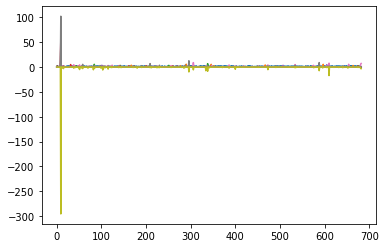

In [155]:
for j in range(0, len(Fit), 1):
    plt.plot(Fit[j] * pd.DataFrame(R).iloc[:, j])
    # Peso * Funções_Geradas
print("Gráficos Gerados por cada Polo_Neuronio, antes da Interpolação")

In [156]:
# Teste da Base de Dados de Cancer, para comparar com sklearn.GaussianNaiveBayes
# Resultados arredondados, para comparar com GaussianNaiveBayes
if Base_Original == "breastCancer.xlsx":
    Ajustado = Predicao.copy()
    Ajustado[Ajustado > 3] = 4
    Ajustado[Ajustado < 3] = 2
    Predicao_Ajustado = Ajustado.astype("int")
    print("Accuracy RBF Classifier: "
          , accuracy(np.array(Y), np.array(Predicao_Ajustado)), "%")

Accuracy RBF Classifier:  65.00732064421669 %
